# Cvičení 2: Zvukové Signály a Fourierova Transformace

---

## Část 1: Úvod do Zvukových Signálů

#### Co je to Zvukový Signál v Počítači

Zvukový signál v počítači je digitální reprezentace akustických vln. Akustická vlna je průběh tlaku vzduchu v čase. Tyto vlny jsou typicky zachyceny a převedeny do digitální formy pomocí procesu zvaného analogově-digitální konverze (ADC). V digitální formě je zvukový signál reprezentován jako série vzorků, kde každý vzorek představuje amplitudu zvukové vlny v určitém časovém okamžiku (neboli aktuální tlak vzduchu v daném čase).

- **Perioda ($T$)**: Doba, která uplyne mezi opakováními stejné fáze vlny.
- **Frekvence ($f$)**: Počet opakování (period) vlny za sekundu. Vyjadřuje se v hertzech (Hz).

$$ T = \frac{1}{f},~~~ f = \frac{1}{T}$$

- **Vzorkovací Frekvence ($f_s$)**: Počet vzorků zvukového signálu získaných za sekundu.


Nejprve si načteme všechny potřebné knihovny


In [1]:
# nejprve mačteme balíčky které budeme potřebovat
import numpy as np  # knihovna NumPy pro lineární algebru
import matplotlib.pyplot as plt  # knihovna Matplotlib pro vykreslování
from IPython.display import Audio  # interaktivní prvek pro přehrávání zvuku
from scipy.io import wavfile  # načítání zvukového souboru wav
from scipy import signal as sgn  # scipy modul pro zpracování signálů

#### Příklad Kódu: Vytvoření Zvukového Signálu v Pythonu s Použitím Numpy


Pro generování posloupnosti čísel (například dělení osy `x` pro diskretizaci spojité funkce) použijeme:
**`np.linspace`**

Vstupní parametry:

- `start`: Počáteční hodnota posloupnosti
- `stop`: Koncová hodnota posloupnosti
- `num`: Počet prvků posloupnosti
- `endpoint`: Pokud je `True`, koncová hodnota je součástí posloupnosti, jinak není. (tedy krok je `(stop-start)/(num-1)`)


### Úkol 1: Vytvořte zvukový signál s frekvencí 440 Hz (sinusoida) a délkou 5 sekund při vzorkovací frekvenci 44100 Hz.


In [2]:
# Parametry signálu
frekvence = 440  # Frekvence v Hz (A4 tón)
vzorkovaci_frekvence = 44100  # Vzorkovací frekvence v Hz
trvani = 5.0  # Trvání signálu v sekundách

# Generování časové osy
t = np.linspace(start=0, stop=trvani, num=int(vzorkovaci_frekvence * trvani), endpoint=False)

# Generování signálu
signal = np.sin(2 * np.pi * frekvence * t)

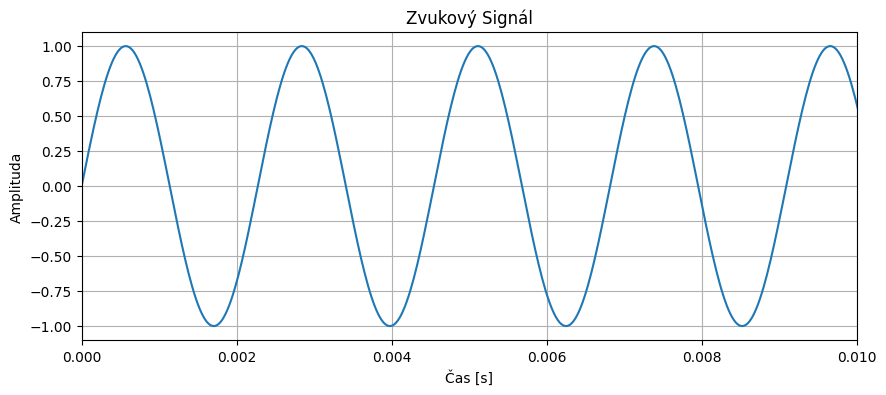

In [3]:
# Vykreslení signálu
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.xlim(0, 0.01)  # Zobrazení pouze prvních 10 ms, jinak bychom moc nepoznali
plt.title("Zvukový Signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid()
plt.show()

##### Ukázka přehrávání zvuku v Pythonu


In [ ]:
Audio(signal, rate=vzorkovaci_frekvence)

#### 1.1: Složení Zvukového Signálu z Více Vln

---

#### Zvukový Signál Složený z Vícero Vln

V reálném světě nejsou zvukové signály obvykle tvořeny jednou sinovou vlnou, ale jsou složením několika vln s různými frekvencemi, amplitudami a různými fázemi. Každý zvuk, který slyšíme, může být rozložen na sérii sinových nebo kosinových vln různých frekvencí, amplitud a fází.

$$x = a_1 \sin (b_1 2 \pi x + c_1) + a_2 \sin (b_2 2 \pi x + c_2) + \ldots$$

- $a_n$ je amplituda $n$-té vlny
- $b_n$ je frekvence $n$-té vlny
- $c_n$ je fáze $n$-té vlny


### Úkol 2.: Vytvoření Složeného Zvukového Signálu

Vytvořte složený zvukový signál, který je složen z 3 sinových vln s frekvencemi 440 Hz, 880 Hz a 1320 Hz, amplitudami 1, 0.5 a 0.25 a fázemi $0$, $\pi/2$ a $\pi$.


In [ ]:
# Parametry signálu
vzorkovaci_frekvence = 44100  # Vzorkovací frekvence v Hz
trvani = 5.0  # Trvání signálu v sekundách

# Frekvence komponent
frekvence_komponent = [440, 880, 1320]  # Frekvence v Hz (A4, A5, E6)

# Amplitudy komponent
amplitudy_komponent = [1.0, 0.5, 0.25]  # Amplitudy (1, 0.5, 0.25)

# Fázové posuny komponent
fazove_posuny_komponent = [0, np.pi / 2, np.pi]  # Fázové posuny (0, pi/2, pi)

In [ ]:

# Generování časové osy
t = np.linspace(0, trvani, int(vzorkovaci_frekvence * trvani), endpoint=False)

# Generování složeného signálu
signal = np.zeros_like(t)

#  zip sloučí seznamy do jednoho seznamu pro jednodušší iteraci
for a, f, p in zip(amplitudy_komponent, frekvence_komponent, fazove_posuny_komponent):
    signal += a * np.sin(2 * np.pi * f * t + p)

In [ ]:
# Vykreslení signálu
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.xlim(0, 0.01)  # Zobrazení pouze prvních 10 ms, jinak bychom moc nepoznali
plt.title("Složený Zvukový Signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid()
plt.show()

#### Opět přehrajeme zvuk v Pythonu


In [ ]:
Audio(signal, rate=vzorkovaci_frekvence)

#### 1.2: Jak vypadá skutečný zvukový signál?

Ze souboru A4.waw nahrajeme náhrávku zvuku noty na klavíru a zobrazíme si její graf.


In [ ]:
# Načtení WAV souboru
audio_path = 'A4.wav'
vzorkovaci_frekvence, signal = wavfile.read(audio_path)

In [ ]:
# Výpočet délky zvuku v sekundách
delka_nahravky = len(signal) / vzorkovaci_frekvence

# Generování časové osy
casova_osa = np.linspace(0, delka_nahravky, len(signal))

# Vykreslení zvukové vlny
plt.figure(figsize=(10, 4))
plt.plot(casova_osa, signal)
plt.title('Zvuková vlna souboru A4.wav')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')
plt.show()

# Ještě jednou, ale s omezeným rozsahem
plt.figure(figsize=(10, 4))
plt.plot(casova_osa, signal)
plt.xlim(0, 0.01)  # Zobrazení pouze prvních 10 ms, jinak bychom moc nepoznali
plt.title('Zvuková vlna souboru A4.wav')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')
plt.show()

Opět přehrajeme zvuk v Pythonu.


In [ ]:
Audio(signal, rate=vzorkovaci_frekvence)

---

## Část 2: Úvod do Fourierovy Transformace

### Co Je Fourierova Transformace

Fourierova transformace je matematický nástroj, který umožňuje rozložit složený zvukový signál na jednotlivé sinové a kosinové vlny různých frekvencí. Tento proces nám pomáhá pochopit, jaké frekvenční komponenty jsou v signálu přítomny. Fourierova transformace je klíčová pro analýzu zvukových signálů, protože umožňuje identifikovat a oddělit různé zvukové tóny a harmonické komponenty.


Začněme s minimálním úvodem do komplexních čísel.

##### Krátké Vysvětlení Komplexních Čísel

Komplexní čísla jsou rozšířením reálných čísel a obsahují "imaginární" jednotku $ i $ (pro kterou platí $ i^2 = -1 $). Každé komplexní číslo má reálnou část a imaginární část. V kontextu Fourierovy transformace, komplexní čísla umožňují efektivní reprezentaci oscilací a fázových vztahů signálu. Imaginární část se týká sinových komponent, zatímco reálná část se týká kosinových komponent.

Pro naše potřeby nám bude stačit, že reálná a imaginární část určuje separátní složky signálu.

### Vzorec pro Fourierovu Transformaci

**Zatím se neděste, že vzorec vypadá složitě. Vše si postupně vysvětlíme.**

Fourierova transformace $ F(\omega) $ signálu $ x(t) $ je definována vzorcem:

$$ F(\omega) = \int _{-\infty} ^{\infty} x(t) e^{-i 2 \pi \omega t} dt $$

kde:

- $ F(\omega) $ je Fourierova transformace signálu.
- $ x(t) $ je původní signál v čase.
- $ \omega $ je frekvence (v Hz).
- $ e^{-i 2 \pi \omega t} $ je komplexní exponenciála, která může být rozložena na sinovou a kosinovou část.

### Rozklad na sinovou a Kosinovou Část

Komplexní exponenciála $ e^{-i 2 \pi \omega t} $ může být rozložena pomocí Eulerova vzorce na sinovou a kosinovou část:

$$ e^{-i 2 \pi \omega t} = \cos( 2 \pi \omega t) - i \sin( 2 \pi \omega t) $$

Takže Fourierova transformace se dá chápat jako kombinace integrací přes kosinové a sinové komponenty signálu.


### Zjednodušení pro praktické použití

Předpokládejme, že náš signál trvá pouze 1 sekundu, tj. $ x(t) = 0 $ kdekoliv mimo interval $ t \in [0, 1] $. Tedy i integrál bude stačit integrovat v intervalu $ [0, 1] $. 

Dále si rozdělme výstup Fourierovy transformace na reálnou (kosinovou) a imaginární (sinovou) část:

$$ F_{\cos}(\omega) = \int_{0}^{1} x(t) \cos( 2 \pi \omega t) dt $$

$$ F_{\sin}(\omega) = - \int_{0}^{1} x(t) \sin( 2 \pi \omega t) dt $$

Nyní pokud chceme například zjistit jaké zastoupení má frekvence 3 Hz v našem signálu (její kosinová a sinová komponenta), stačí nám vypočítat:

$$ F_{\cos}(3) = \int_{0}^{1} x(t) \cos( 2 \pi 3 t) dt $$
$$ F_{\sin}(3) = - \int_{0}^{1} x(t) \sin( 2 \pi 3 t) dt $$


Ukážeme si to nejprve na jednoduchém příkladu, kde signál $ x(t) $ je sinová vlna s frekvencí 3 Hz.

Nejprve si ukážeme jak vypadá určení různých frekvenčních komponent (2Hz, 3Hz, 4Hz).


In [ ]:
# vyrobení signálu a příslušných sinusoid pro frekvence 2, 3 a 4 Hz
t = np.linspace(0, 1, 44100, endpoint=False)
signal = np.sin(2 * np.pi * 3 * t)
fs2 = np.sin(2 * np.pi * 2 * t)
fs3 = np.sin(2 * np.pi * 3 * t)
fs4 = np.sin(2 * np.pi * 4 * t)

# vykreslení signálu a příslušných sinusoid
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label="signal", linewidth=3, color='black')
plt.plot(t, fs2, label="fs2", linestyle='dashed')
plt.plot(t, fs3, label="fs3", linestyle='dashed')
plt.plot(t, fs4, label="fs4", linestyle='dashed')
plt.legend()
plt.show()

Integrál je pouze plocha pod křivkou, ukážeme si její vizualizaci.


In [ ]:
plt.figure(figsize=(10, 4))

# grafy signálu přenásobeného frekvencí a plochy pod ním
plt.plot(t, signal * fs2, label="f=2")
plt.fill_between(t, signal * fs2, alpha=0.5)

plt.plot(t, signal * fs3, label="f=3")
plt.fill_between(t, signal * fs3, alpha=0.5)

plt.plot(t, signal * fs4, label="f=4")
plt.fill_between(t, signal * fs4, alpha=0.5)

plt.legend()
plt.show()

Plochu pod křivkou můžeme spočítat numericky například pomocí "obdelníkového pravidla".

- známe hodnoty na ose $x$ (čas) a jejich příslušné hodnoty na ose $y$ (amplituda signálu)
- předpokládáme, že mezi dvěma vzorky/body je funkce, kterou integrujeme konstantní o hodnotě hodnoty v prvním (menším $x$/ bodu vlevo) bodě


### Úkol 3: Pro zadaný signál vypočítejte $F_{\sin}(2),~F_{\sin}(3),~F_{\sin}(4)$

In [ ]:
delka_vzorku_sec = 1.0 / 44100
Fsin_2 = np.sum(signal * fs2 * delka_vzorku_sec)
Fsin_3 = np.sum(signal * fs3 * delka_vzorku_sec)
Fsin_4 = np.sum(signal * fs4 * delka_vzorku_sec)

In [ ]:
print(f"Pro frekvenci 2Hz je plocha pod křivkou {Fsin_2:.5f}.")
print(f"Pro frekvenci 3Hz je plocha pod křivkou {Fsin_3:.5f}.")
print(f"Pro frekvenci 4Hz je plocha pod křivkou {Fsin_4:.5f}.")

**Nyní si ukážeme jak bychom mohli vypočítat Fourierovu transformaci (její hodnoty v jednotlivých frekvencích v celočíselných Hz) pro testovací signál.**


In [ ]:
# časová osa na [0, 5) s
trvani = 5.0 # sekundy
vzorkovaci_frekvence = 44100 # Hz
t = np.linspace(0, trvani, int(vzorkovaci_frekvence * trvani), endpoint=False)

# signál jakožto kombinace sinusoid s různými frekvencemi, amplitudami a fázovými posuny

frekvence = [120, 333, 440]
amplitudy = [2, 1.5, 0.75]
fazove_posuny = [np.pi / 3, np.pi / 2, np.pi]

signal = np.zeros_like(t)

for f, a, p in zip(frekvence, amplitudy, fazove_posuny):
    signal += a * np.cos(2 * np.pi * f * t + p)

### Úkol 4: Vypočítejte Fourierovu transformaci (sinové a kosinové složky pro frekvence 1 až 500Hz) pro zadaný signál

In [ ]:
# spočteme Fourierovu transformaci for celočíselné frekvence od 1 do 500
omega_array = np.arange(1, 501)

sinova_cast = np.zeros_like(omega_array, dtype=float)
kosinova_cast = np.zeros_like(omega_array, dtype=float)

delka_vzorku_sec = 1.0 / 44100

for i, omega in enumerate(omega_array):
    f_sin = -np.sin(2 * np.pi * omega * t)
    f_cos = np.cos(2 * np.pi * omega * t)
    sinova_cast[i] = np.sum(signal * f_sin * delka_vzorku_sec)
    kosinova_cast[i] = np.sum(signal * f_cos * delka_vzorku_sec)

Nyní si vykreslíme výslednou Fourierovu transformaci.

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(omega_array, kosinova_cast, label="kosinová část")
plt.plot(omega_array, sinova_cast, label="sinová část", linestyle='dashed')
plt.legend()
plt.show()

Které frekvence jsou v signálu přítomny?


- `np.where` vrací indexy prvků, které splňují podmínku (konkrétně list indexů v jednotlivých dimenzích - zde pouze jeden neboť se jedná o vektor).


In [ ]:
# [0] -> chceme souřadnice v 1. dimenzi
idx = np.where(sinova_cast**2 + kosinova_cast**2 > 1e-6)[0]
print(f"Nezanedbatelné jsou pouze frekvence {omega_array[idx]}.")

Zkusíme z těchto výsledků dopočítat parametry původního signálu.

Pomůže nám k tomu obrázek.


In [ ]:
plt.figure(figsize=(6, 6))

for i in idx:
    plt.plot(kosinova_cast[i], sinova_cast[i], 'o', label=f"omega={omega_array[i]}")
    plt.plot([0, kosinova_cast[i]], [0, sinova_cast[i]], 'k--')  # type: ignore

# Add unit circle
circle = plt.Circle((0, 0), 1 * trvani, color='black', fill=False)  # type: ignore
plt.gca().add_patch(circle)

# Set axis scale to be equal
plt.axis('equal')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(np.arange(-1, 1.25, 0.25) * trvani)
plt.yticks(np.arange(-1, 1.25, 0.25) * trvani)
plt.xlabel("Kosinová část")
plt.ylabel("Sinová část")
plt.legend()
plt.show()

Zopakujme, si jaké bylo zadání:

```
frekvence = [120, 333, 440]
amplitudy = [2, 1.5, 0.75]
fazove_posuny = [np.pi / 3, np.pi / 2, np.pi]
```

Tedy:

- amplituda je 2x vzdálenost od středu k vrcholu podělená trváním signálu
    - amplituda nezáleží na délce signálu, ale výsledek integrálu ano
- fázový posun je rotace o daný úhel z bodu (1, 0)

**Proč je amplituda 2x vzdálenost od středu k vrcholu?**

- ve skutečnosti Fourierova transformace $ F(\omega) $ je i pro záporná $\omega$ (tj. pro záporné frekvence).
- tedy budou přítomy i záporné frekvence [-120, -333, -440] které budou mít stejnou amplitudu jako kladné frekvence -> tedy polovinu skutečné amplitudy.


---
## Část 3: DFT/FFT a Jak to funguje v praxi?

Použitý postup je poměrně neefektivní, v praktických aplikacích (komprese zvuku, obrazu,...) se Fourierova transformace počítá tisíce až miliony krát za vteřinu (a to i na zařízeních, které se vám vejdou na zápěstí). 

Navíc pracujeme s diskrétními signály. Integraci jsme v nahradili sumou skrze jednotlivé body. Jedná se o tzv. Diskrétní Fourierovu Transformaci (DFT).

Při DFT v principu nepočítáme s frekvencemi ve spojitém čase, ale s frekvencemi ve vzorkovaném čase tedy vůči počtu vzorků. Neboť samotná DFT "neví" o použité vzorkovací frekvenci.

#### DFT

Máme-li signál $x$ o délce $N$, pak při DFT získáme komplexní vektor o stejné délce:
$$X = \text{DFT}(x),$$
tedy počítáme Fourierovu transformaci pouze pro vybrané frekvence $k$:

$$ k=0,\ldots  N$$


$$ F_{\cos}(k) = \text{Re}(X[k]) = \sum_{n=0}^{N-1} x[n]  \cos\left(\frac{2\pi kn}{N}\right) $$

$$ F_{\sin}(k) = \text{Im}(X[k]) = -\sum_{n=0}^{N-1} x[n]  \sin\left(\frac{2\pi kn}{N}\right) $$

Pokud chceme znát skutečné frekvenční složky, které jsou v signálu přítomny, musíme je přepočítat na frekvence ve spojitém čase.  Na toto použijeme vzorkovací frekvenci $f_s$:

$$ \omega = \frac{k f_s}{N}$$

Pro tyto výpočty se používají "chytré" implementace, které využívají vlastností $\sin$ a $\cos$. Nejznámější je tzv. Fast Fourier Transform (FFT), která využívá symetrie a periodičnosti sinových a kosinových funkcí.

**A samozřejmě je její implementace v knihovně numpy.**


In [ ]:
fft_result = np.fft.fft(signal)

plt.figure(figsize=(10, 4))
plt.plot(np.real(fft_result), label="kosinová část")  # reálná část je kosinová část
plt.plot(np.imag(fft_result), label="sinová část")  # imaginární část je sinová část
plt.legend()
plt.show()

**Co to vlastně vidíme?**

- Symetrie ve výsledcích DFT pro reálné signály je důsledkem

$$ \text{Re}(X[k]) = \text{Re}(X[N-k]) $$
$$ \text{Im}(X[k]) = -\text{Im}(X[N-k]) $$

- Často nám stačí znát pouze první polovinu výsledků DFT, pak využijeme funkci `np.fft.rfft`
    
- Hodnoty na ose $y$ jsou mnohem vyšší, neboť DFT nevrací "skutečný integrál" pouze nenormalizovanou sumu
    - musíme podělit počtem vzorků (délkou signálu) $N$ a přenásobit délkou signálu v čase $T$ (tj. $N/f_s$) = tedy pouze podělit vzorkovací frekvencí $f_s$.

**Takže jak z výsledků DFT získáme kosínové a sinové složky v závislosti na frekvenci?**

- `np.fft.fftfreq`/`np.fft.rfftfreq` vrací frekvence odpovídající jednotlivým prvkům výsledku DFT.
    - parametr `n` je délka signálu
    - parametr `d` je "krok" mezi jednotlivými vzorky v sekundách, tedy $d=\frac{1}{f_s}$

Kdybychom toto chtěli udělat ručně, museli bychom si vypočítat frekvence odpovídající jednotlivým prvkům výsledku DFT zvlášť pro kladnou (první polovina výsledku) a zápornou (druhá polovina výsledku) frekvenci.

Pro klaďnou frekvenci bychom použili vzorec:

```
N = len(signal)
vzorkovaci_frekvence = 44100
freq = np.arange(N) / N * vzorkovaci_frekvence

```


### Úkol 5: Vypočítejte DFT pro zadaný signál a replikujte předchozí graf spektra

- použijte `np.fft.rfft` pro výpočet DFT
- použijte `np.fft.rfftfreq` pro výpočet frekvencí odpovídajících jednotlivým prvkům výsledku DFT (osa `x`)
- nezapoomeňte na normalizaci
- vykreslete pouze for frekvence 0 až 500 Hz

In [ ]:
# Vypočítání DFT signálu
N = len(signal)
vzorkovaci_frekvence = 44100

# DFT signálu (pouze první polovina)
fft_result = np.fft.rfft(signal)

# Frekvence pro každý bod DFT
x_axis_freqs = np.fft.rfftfreq(n=N, d=1 / vzorkovaci_frekvence)

# Rozdělení DFT výsledku na reálnou a imaginární složku a normalizace
normalizace = 1 / vzorkovaci_frekvence
kosinova_cast = fft_result.real * normalizace
sinova_cast = fft_result.imag * normalizace

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(x_axis_freqs, kosinova_cast, label="kosinová část")
plt.plot(x_axis_freqs, sinova_cast, label="sinová část", linestyle='dashed')
plt.legend()
plt.xlim(0, 500)
plt.show()

### Amplitudové Spektrum

Nejčastější informací, kterou potřebujeme získat o signálu je pouze amplitudové spektrum. 

In [ ]:
normalizace = 1 / vzorkovaci_frekvence
trvani = len(signal) / vzorkovaci_frekvence
amplitudove_spektrum = np.abs(fft_result) * 2 * normalizace / trvani

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(x_axis_freqs, amplitudove_spektrum, label="amplitudové spektrum")
plt.legend()
plt.xlim(0, 500)
plt.show()

### Úkol 6: Jak tedy vypadá amplitudové spektrum noty A4 z našeho příkladu?
Za použití `np.fft.rfft` a `np.fft.rfftfreq` vykreslete spektrum (0 až 5000Hz) noty A4 (`A4.wav`) z našeho příkladu.

In [ ]:
# Načtení WAV souboru
audio_path = 'A4.wav'
vzorkovaci_frekvence, signal = wavfile.read(audio_path)

# Vypočítání DFT signálu
N = len(signal)
fft_result = np.fft.rfft(signal)

# Frekvence pro každý bod DFT
x_axis_freqs = np.fft.rfftfreq(n=N, d=1 / vzorkovaci_frekvence)

# Rozdělení DFT výsledku na reálnou a imaginární složku
normalizace = 1 / vzorkovaci_frekvence
trvani = len(signal) / vzorkovaci_frekvence
amplitudove_spektrum = np.abs(fft_result) * 2 * normalizace / trvani

plt.figure(figsize=(10, 4))
plt.plot(x_axis_freqs, amplitudove_spektrum, label="amplitudové spektrum")
plt.legend()
plt.xlim(0, 5000)
plt.show()

Vidíme základní frekvenční složku (440Hz) a její harmonické frekvence (její násobky).


Jelikož jsou zvukové soubory uloženy v 16-bitovém formátu, tak hodnoty vzorků (tlaku vzduchu) jsou celočíselné hodnoty v rozsahu $[-2^{15}, 2^{15}-1]$. Tedy výsledné amplitudy nejsou pro nás uplně čitelné. 

Proto budeme signály před zpracováním normalizovat na rozsah $[-1, 1]$, pomocí podělení jeho maximální hodnotou (v absolutní hodnotě).

In [ ]:
signal_normalizovany = signal / np.max(np.abs(signal))
fft_result = np.fft.rfft(signal_normalizovany)

amplitudove_spektrum = np.abs(fft_result) * 2 * normalizace / trvani

plt.figure(figsize=(10, 4))
plt.plot(x_axis_freqs, amplitudove_spektrum, label="amplitudové spektrum")
plt.legend()
plt.xlim(0, 5000)
plt.show()

## Část 4: Okenní Fourierova Transformace

#### Co je to Okenní Fourierova Transformace

Pokud máme delší zvukový signál, který obsahuje různé tóny v různých časových sekcích, nebude nám stačit jednoduchá Fourierova transformace. Dala by nám totiž pouze celkový pohled na signál bez informace o čase výskytů jednotlivých frekvencí. Okenní Fourierova transformace (WFT) je způsob, jak získat frekvenční složky signálu v čase.

WFT je vlastně Fourierova transformace aplikovaná na krátké časové úseky signálu. Výsledkem je 2D matice, která obsahuje frekvenční složky signálu v čase.

Tedy:

- vybereme si ze signálu sérii stejně dlouhých krátkých úseků (okének)
  - můžeme signál pouze rozdělit, ale můžeme také použít překryv okének
  - obvykle definujeme `velikost_okna` a `posun_okna`
  - také je možné použít různé funkce pro "ořezávání" okének, tedy nevyřezávat ze signálu dle obdelníkové šablony, ale použít libovolnou jinou šablonu (např. Hammingovo okno)
- na každé okénko aplikujeme Fourierovu transformaci (DFT)
- výsledkem je matice, kde na ose x je čas a na ose y jsou frekvence
- **pozor, čím lepší indentifikace v čase = menší velikost okna, tím horší identifikace ve frekvencích (menší rozlišení na ose y) a samozřejmě naopak**


In [ ]:
# načteme data ze souboru
vzorkovaci_frekvence, signal = wavfile.read('butterfly.wav')
signal = signal / np.max(np.abs(signal)) # normalizace na rozsah [-1, 1]

delka_nahravky = len(signal) / vzorkovaci_frekvence
print(f"Vzorkovací frekvence: {vzorkovaci_frekvence} Hz")
print(f"Délka nahrávky: {delka_nahravky:.2f} s")

Přehrajeme si zvukový signál.


In [ ]:
Audio(signal, rate=vzorkovaci_frekvence)

Zvolíme si velikost okna a posun okna (zatím zůstaneme u obdelníkového okna).

Můžeme to udělat v sekundách a použít vzorkovací frekvenci pro výpočet počtu vzorků v okně a posunu okna.


In [ ]:
delka_okna_sekundy = 0.1
posun_okna_sekundy = 0.01

velikost_okna = int(delka_okna_sekundy * vzorkovaci_frekvence)
posun_okna = int(posun_okna_sekundy * vzorkovaci_frekvence)

print(f"Velikost okna: {velikost_okna}")
print(f"Posun okna: {posun_okna}")

### Úkol 7: Pro zadaný signál, velikost okna a posun okna vypočítejte okenní Fourierovu transformaci a uložte velikosti amplitud do matice

- Provedeme rozbití signálu na okénka a zároveň spočítáme jejich DFT (použijeme `np.fft.rfft`)
- spočteme amplitudové spektrum a přidáme do listu se spektry
- pomocí `np.stack` vytvoříme z listu vektorů matici = časově-frekvenční spektrogram


In [ ]:
N = len(signal)
zacatek_okna = 0
konec_okna = velikost_okna
okeni_fft = []
pocet_oken = 0

while konec_okna <= N:
    okno = signal[zacatek_okna:konec_okna]
    normalizace = 1 / vzorkovaci_frekvence
    okeni_fft.append(np.abs(np.fft.rfft(okno) * 2 * normalizace / delka_okna_sekundy))
    zacatek_okna += posun_okna
    konec_okna += posun_okna
    pocet_oken += 1

casove_frekvencni_matice = np.vstack(okeni_fft).T  # chceme mít čas na ose x, tedy ve sloupcích

print(f"Počet okének: {pocet_oken}")

Vykreslíme si výslednou matici jako obrázek pomocí `plt.imshow`.

In [ ]:
print(f"Rozměry matice: {casove_frekvencni_matice.shape}")

plt.figure(figsize=(4, 4))
plt.imshow(casove_frekvencni_matice)
plt.show()

Na výsledném obrázku toho moc nevidíme, navíc potřebujeme správné rozsahy os. K tomu se nám bude hodit jiná vykreslovací funkce.

- spočteme příslušné hodnoty na ose x: čas od 0 do `delka_nahravky`
- spočteme příslušné hodnoty na ose y: frekvence např. pomocí `np.fft.rfftfreq`
- vykreslíme obrázek pomocí funkce `plt.pcolormesh`
  - první parametr jsou hodnoty na ose x
  - druhý parametr jsou hodnoty na ose y
  - třetí parametr je matice hodnot, které chceme vykreslit
  - můžeme použít parametr `cmap` pro změnu barevného schématu

In [ ]:
x_axis = np.linspace(0, delka_nahravky, pocet_oken, endpoint=False)
y_axis = np.fft.rfftfreq(n=velikost_okna, d=1 / vzorkovaci_frekvence)


plt.figure(figsize=(10, 4))
plt.pcolormesh(x_axis, y_axis, casove_frekvencni_matice, cmap='jet')
plt.colorbar()
plt.xlabel('Čas (s)')
plt.ylabel('Frekvence (Hz)')
plt.show()

Základní frekvence hraných not jsou pouze v rozsahu do cca 1000 Hz, takže si zobrazíme pouze menší rozpětí na frekvenční ose.

In [ ]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(x_axis, y_axis, casove_frekvencni_matice, cmap='jet')

plt.colorbar()
plt.xlabel('Čas (s)')
plt.ylabel('Frekvence (Hz)')

plt.ylim(0, 4400)

plt.show()

Celý process okenní Fourierovy transformace je samozřejmě implementován v knihovně `scipy` a to v modulu `signal` pod názvem `spectrogram`. 

Poznámka, `spectrogram` má mnoho parametrů, může vracet různé typy spektrogramů. Nás zajímá amplitudové spektrum, a tedy použijeme parametry:

- `mode='magnitude'`  (amplitudové spektrum, z dalších možností lze napočítat např. fázové spektrum, celý komplexní spektrogram, atd.)
- `scaling='spectrum'` (normalizace při amplitudovém spektru)

Výsledek budeme muset ale ještě přenásobit 2, abychom dostali správné amplitudy. 

Dále, pokud chceme použít stejný typ okna jako předtím tak použijeme:

- `window='boxcar'` (tvar okna, zde obdelníkové)
- `nperseg=velikost_okna` (velikost okna ve vzorcích)
- `noverlap=velikost_okna - posun_okna` (překryv okének ve vzorcích, pro nás je to `velikost_okna - posun_okna`)



In [ ]:
# výpočet spektrogramu pomocí scipy.signal
y_axis, x_axis, casove_frekvencni_matice = sgn.spectrogram(signal,
                                                           fs=vzorkovaci_frekvence,
                                                           window='boxcar',  # obdélníkové okno
                                                           nperseg=velikost_okna,  # velikost okna
                                                           noverlap=velikost_okna - posun_okna,  # překryv
                                                           scaling='spectrum',  # přeškálování barev
                                                           mode='magnitude')  # amplituda

plt.figure(figsize=(10, 4))
plt.pcolormesh(x_axis, y_axis, casove_frekvencni_matice * 2, cmap='jet')
plt.colorbar()
plt.xlabel('Čas (s)')
plt.ylabel('Frekvence (Hz)')

plt.ylim(0, 4400)

plt.show()